In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [32]:
df = pd.read_csv(r'C:\Users\alexd\car_data\Cdn_New_Car_Sales\canada_new_cars_sales.csv', low_memory=False)
df.dtypes
#df.head()
#display(df.isna().any())
#df['fuel_cost'] = df['fuel_cost'].astype('float64')

period            object
tot_cars           int64
val_unit_c_000     int64
fuel_cost          int64
cpi_ex_energy      int64
dtype: object

In [13]:
df = df.set_index('period')
df.head()

,tot_cars,val_unit_c_000,fuel_cost,cpi_ex_energy
period,,,,
10-Sep,137349.0,33.0,102,115
10-Oct,125731.0,34.0,105,116
10-Nov,118521.0,34.0,107,116
10-Dec,114376.0,36.0,110,115
11-Jan,86320.0,34.0,114,116


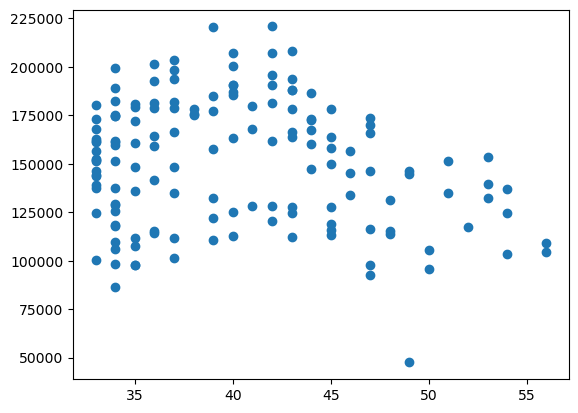

In [33]:
y = df['tot_cars']
x = df['val_unit_c_000']
plt.scatter(x, y)
plt.show()


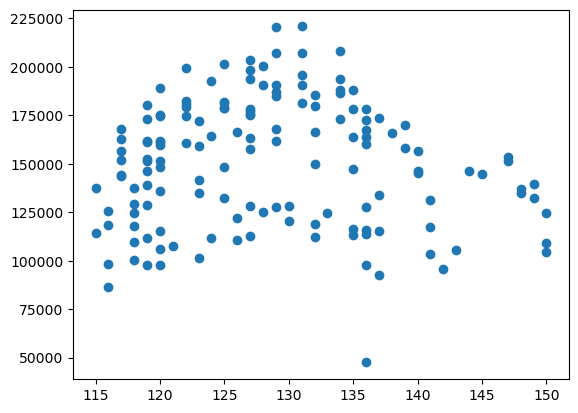

In [34]:
y = df['tot_cars']
x = df['cpi_ex_energy']
plt.scatter(x, y)
plt.show()

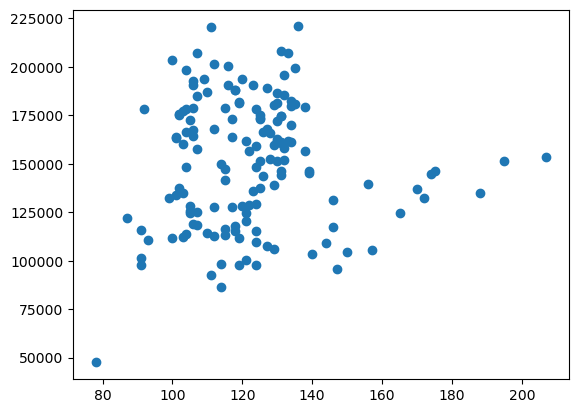

In [37]:
y = df['tot_cars']
x = df['fuel_cost']
plt.scatter(x, y)
plt.show()

In [38]:
df.corr()

,tot_cars,val_unit_c_000,fuel_cost,cpi_ex_energy
tot_cars,1.000000,-0.192823,0.028571,-0.054106
val_unit_c_000,-0.192823,1.000000,0.372792,0.973776
fuel_cost,0.028571,0.372792,1.000000,0.420308
cpi_ex_energy,-0.054106,0.973776,0.420308,1.000000


In [39]:
df.describe()

,tot_cars,val_unit_c_000,fuel_cost,cpi_ex_energy
count,149.000000,149.000000,149.000000,149.000000
mean,150825.134228,40.201342,122.362416,128.577181
std,32635.055718,6.123702,20.055738,9.040585
min,47508.000000,33.000000,78.000000,115.000000
25%,124585.000000,35.000000,107.000000,120.000000
50%,152577.000000,39.000000,121.000000,127.000000
75%,177191.000000,44.000000,131.000000,135.000000
max,220858.000000,56.000000,207.000000,150.000000


Testing for shape of the indendent variables. Ideal shape mimics a normal distribution. 
Kurtosis measure how peaky or how flat the distribution is by how much data is under the tails of the distribution. Are they 'heavy' or 'light'.
Skewness measures the degree of shift to the left or the right of a normal distribution. It reads from 'moderate' to 'severe'


In [43]:
val_unit_c_000_kurtosis = kurtosis(df['val_unit_c_000'], fisher = True)
fuel_cost_kurtosis = kurtosis(df['fuel_cost'], fisher = True)
cpi_ex_energy_kurtosis = kurtosis(df['cpi_ex_energy'], fisher = True)

val_unit_c_000_skew = skew(df['val_unit_c_000'])
fuel_cost_skew = skew(df['fuel_cost'])
cpi_ex_energy_skew = skew(df['cpi_ex_energy'])

display("Value Kurtosis: {:.2}".format(val_unit_c_000_kurtosis))
display("Fuel Cost Kurtosis: {:.2}".format(fuel_cost_kurtosis))
display("CPI excl Energy Kurtosis: {:.2}".format(cpi_ex_energy_kurtosis))

display('Value Skew: {:.2}'.format(val_unit_c_000_skew))
display('Fuel Cost Skew: {:.2}'.format(fuel_cost_skew))
display('CPI excl Energy: {:.2}'.format(cpi_ex_energy_skew))

'Value Kurtosis: -0.49'

'Fuel Cost Kurtosis: 3.2'

'CPI excl Energy Kurtosis: -0.5'

'Value Skew: 0.66'

'Fuel Cost Skew: 1.3'

'CPI excl Energy: 0.55'

Kurtosis for normal distribuition K = 3, K > 3 = heavy tails, K < 3 = light tails
Skew for normal distibution S = 0, S = -0.5 to +0.5 = moderate, S < -1.0 or > +1.0 = severe

In [44]:
display('Value')
display(stats.kurtosistest(df['val_unit_c_000']))
display(stats.skewtest(df['val_unit_c_000']))

display('Fuel Cost')
display(stats.kurtosistest(df['fuel_cost']))       
display(stats.skewtest(df['fuel_cost']))  

display('CPI excl Energy')
display(stats.kurtosistest(df['cpi_ex_energy']))       
display(stats.skewtest(df['cpi_ex_energy']))  


'Value'

KurtosistestResult(statistic=-1.3851535914290585, pvalue=0.16600550785206447)

SkewtestResult(statistic=3.164791303592106, pvalue=0.001551942230699281)

'Fuel Cost'

KurtosistestResult(statistic=4.045185487669386, pvalue=5.228171236943214e-05)

SkewtestResult(statistic=5.4336510998454886, pvalue=5.521248814245437e-08)

'CPI excl Energy'

KurtosistestResult(statistic=-1.4525341031689831, pvalue=0.14635315380282687)

SkewtestResult(statistic=2.6853281689140402, pvalue=0.007245862212784608)

Organize dpendent and independent variables.
'Train' and fit the model and get the test parameters

In [48]:
Y = df['tot_cars']
X = df[['val_unit_c_000', 'fuel_cost', 'cpi_ex_energy']]

#print(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.get_params()


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [51]:
print('Intercept is: \n', regression_model.intercept_)
print('Co-efficients are: \n', regression_model.coef_)

Intercept is: 
 -449908.47358124633
Co-efficients are: 
 [-14418.21316896    -78.9692525    9255.26087223]


In [54]:
y_predict = regression_model.predict(X_test)
y_predict[:5]
integer_predictions = np.round(y_predict).astype(int)
print(integer_predictions)


[151377 138234 170317 149587 158131 160837 146542 156373 178353 178862
 124480 156856 146463 156856 178546 160159 154750 160317 170352 160159
 166114 152641 160632 171692 112814 165085 146881 173585 147253 160995]


In [55]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

In [56]:
est.conf_int()

,0,1
const,-626506.140610,-328332.843645
val_unit_c_000,-17715.245048,-11589.210728
fuel_cost,-331.378526,137.612708
cpi_ex_energy,7437.834737,11681.244871


In [57]:
est.pvalues

const             2.896767e-09
val_unit_c_000    8.014736e-17
fuel_cost         4.155063e-01
cpi_ex_energy     2.018020e-15
dtype: float64

Use metrics to determine how will the model predicts the actuals by taking the residual difference between prediction and actual

Mean Absolute Error MAE how big the magnitude of the error is Mean Squared Error MSE the mean of the squared errors exagerates larger errors with the squaring Root Mean Squared Error RMSE is the root of the mean of the squared errors in y-units

In [58]:
# MAE
model_mae = mean_absolute_error(y_test, y_predict)

# MSE
model_mse = mean_squared_error(y_test, y_predict)

# RMSE
model_rmse = math.sqrt(model_mse)

# Print results
print('MAE is {:.3}'.format(model_mae))
print('MSE is {:.3}'.format(model_mse))
print('RMSE is {:.3}'.format(model_rmse))

MAE is 2.13e+04
MSE is 7.79e+08
RMSE is 2.79e+04


In [ ]:
R-sq measures goodness of fit for the model. A high R-sq is the desired result. R-square > .3 is minimum expected unless data is very diverse.


In [59]:
model_r2 = r2_score(y_test, y_predict)
print('R-Squared is {:.2}'.format(model_r2))

R-Squared is 0.23


Summary stats from STATSMODEL.API
Check the R-square
Check the Cond. No for multicollinearity - our model should have independent variables that are orthogonal.

In [60]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               tot_cars   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     30.28
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.93e-15
Time:                        14:10:50   Log-Likelihood:                -1723.3
No. Observations:                 149   AIC:                             3455.
Df Residuals:                     145   BIC:                             3467.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.774e+05   7.54e+04     -6.

<function matplotlib.pyplot.show(close=None, block=None)>

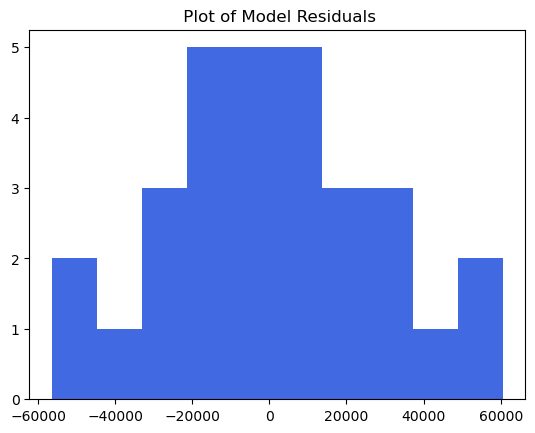

In [61]:
(y_test - y_predict).hist(grid=False, color = 'royalblue')
plt.title(' Plot of Model Residuals')
plt.show

This plot suggests the data is reasonable distributed w/ the exception of the outliers at the end of both tails.

In [64]:
from mpl_toolkits.mplot3d import Axes3D

3-D plot of result is pretty interesting
This just a straight-up multiple regression exercise to get the data for the plot out. No 'learning' involved.

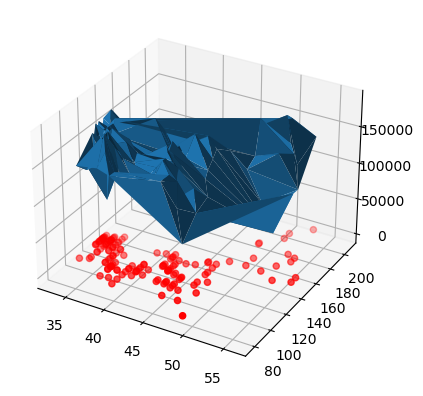

In [100]:
#fit model
model = LinearRegression().fit(df[['val_unit_c_000', 'fuel_cost', 'cpi_ex_energy']], df['tot_cars'])

#get predictions
predictions = model.predict(df[['val_unit_c_000', 'fuel_cost', 'cpi_ex_energy']])

#plot data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['val_unit_c_000'], df['fuel_cost'], df['cpi_ex_energy'], c='r', marker='o')
ax.plot_trisurf(df['val_unit_c_000'], df['fuel_cost'], predictions)

#show plot
plt.show()